Este colab fue desarrollado por Arnold Charry Armero

# Burrito Game Optimization

Se tiene una plaza en la que se ubican edificios con potenciales clientes a los burritos que se están vendiendo a un precio único. Se deben ubicar los camiones en la plaza de tal forma que se maximicen las ganancias de la empresa. Formule un modelo de programación entera que de la solución óptima para la empresa.

#Conjuntos

$ i = \text{Clientes indexados por } i$

$ j = \text{Camiones indexados por } j$


## Parámetros

$D_{i} = \textrm{Demanda para el cliente } i $

$ C_{ij} = \textrm{Distancia del cliente } i \textrm{ al camión } j$

$  \alpha _{ij} = \textrm{Multiplicador de distancia del cliente } i \textrm{ al camión } j$

$ f = \textrm{Costo fijo de colocar un camión } $

$ r = \textrm{Ingreso por vender un burrito } $

$ k = \textrm{costo por los ingredientes del burrito } $

## Variables de decisión

$ x_{j} = \textrm{1 si se coloca el camión } j \textrm{, 0 lo contrario }$

$ y_{ij} = \textrm{1 si el camión más cercano al cliente }  i  \textrm{ está en la ubicación } j$

## Función Objetivo

$$ \textrm{Max } z \textrm{ (Utilidad) }= \sum_{j = 1}^{n}\sum_{i = 1}^{n} (r-k)\alpha _{ij}D_{i}y_{ij} - \sum_{j}^{n}fx_{j}$$

## Restricciones

Sólo puede haber un camión más cerca a los edificios,

$$ \sum_{j = 1}^{n} y_{ij} \leq 1,\forall i$$

Si no se coloca camión, no hay distancia que ponderar,

$$ y_{ij} \leq x_{j}, \forall j$$


In [ ]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 40.5 MB/s eta 0:00:00


In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
clientes = range(17)
camiones = range(16)

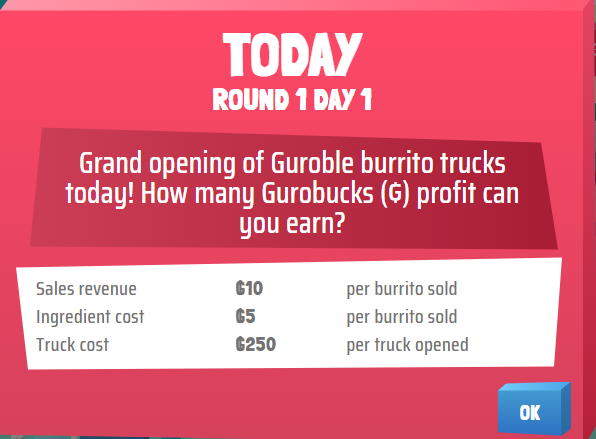

In [ ]:
#Parámetros

r = 10

k = 5

f = 250


In [ ]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Se importan las distancias aij
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Operations II/round1-day1_demand_truck_data.csv')
df.head(10)

,demand_node_index,truck_node_index,distance,scaled_demand
0,demand2,truck8,113.778542,37
1,demand2,truck9,111.963750,38
2,demand2,truck13,234.889084,13
3,demand2,truck17,289.327111,2
4,demand2,truck27,355.813228,0
5,demand2,truck28,414.471809,0
6,demand2,truck29,417.797109,0
7,demand2,truck30,425.320100,0
8,demand2,truck32,626.876133,0
9,demand2,truck35,459.899642,0


In [ ]:
# Inicializar la matriz 'a' con ceros
a = [[0 for _ in range(16)] for _ in range(17)]

# Llenar la matriz 'a' con los valores de 'scaled_demand'
for i in range(17):
    for j in range(16):
        index = i * 16 + j
        a[i][j] = df.iloc[index, 3]

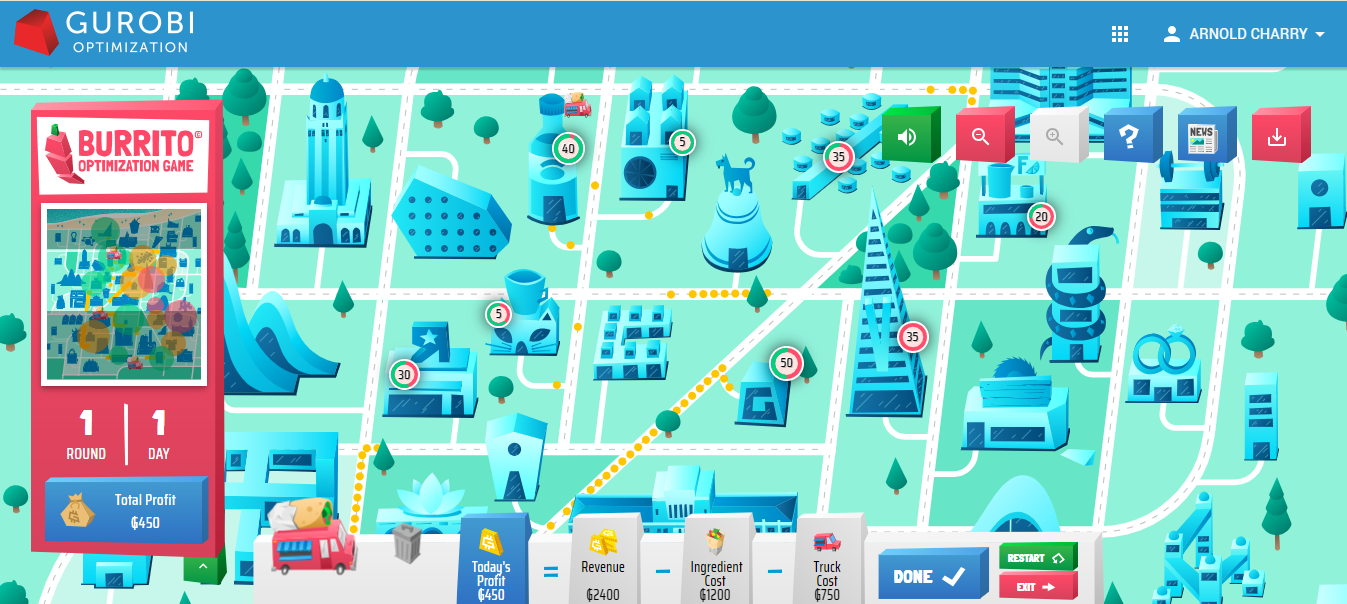

In [ ]:
#Se obtienen datos de la demanda
df2 = pd.read_csv('/content/drive/MyDrive/Operations II/round1-day1_demand_node_data.csv')
df2.head(17)

,index,name,x,y,demand
0,demand2,ReLU Realty,190.720688,72.661102,40
1,demand12,KKT Air Conditioning,256.572130,158.053422,5
2,demand13,Linear Regression Psychology Services,315.279312,163.642738,35
3,demand14,George's Basic Diet Solutions,213.706568,160.537563,40
4,demand18,Callback Cat Café,187.614487,222.641068,5
5,demand19,Toy Problems 'ᴙ' Us,152.203806,245.308848,30
6,demand21,Gurobi Polytope,295.710252,240.961603,50
7,demand22,Vertex Tower,342.924494,231.335559,35
8,demand26,Nonlinear Thinking Center,356.281154,317.038397,10
9,demand33,Interior Point Decorating,267.133211,362.063439,45


In [ ]:
# Crear la instancia del modelo
model = LpProblem(name="Burrito_Game", sense=LpMaximize)

# Definir las variables de decisión
# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (clientes), 0, 1, LpInteger)
Y = LpVariable.dicts("Y", (clientes, camiones), 0, 1, LpInteger)

# Agregar la función objetivo
model += lpSum([[(r-k) * a[i][j] * Y[i][j] for i in clientes] for j in camiones]) - lpSum([X[j] * f for j in camiones])

# Agregar las restricciones

for i in clientes:
  model += lpSum(Y[i][j] for j in camiones) <= 1

for i in clientes:
  for j in camiones:
    model += Y[i][j] <= X[j]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
#Viéndo sólo las variables que dan 1
for j in camiones:
  if X[j].value() != 0:
    print(X[j], "=", X[j].value())

#Viéndo sólo las variables que dan 1
for i in clientes:
  for j in camiones:
    if Y[i][j].value() != 0:
      print(Y[i][j], "=", Y[i][j].value())

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
X_3 = 1.0
X_5 = 1.0
X_14 = 1.0
Y_0_3 = 1.0
Y_1_3 = 1.0
Y_2_3 = 1.0
Y_3_3 = 1.0
Y_4_3 = 1.0
Y_5_3 = 1.0
Y_6_3 = 1.0
Y_7_3 = 1.0
Y_8_14 = 1.0
Y_9_5 = 1.0
Y_10_14 = 1.0
Y_11_14 = 1.0
Y_12_14 = 1.0
Y_13_14 = 1.0
Y_14_5 = 1.0
Y_15_5 = 1.0
Y_16_3 = 1.0
Utilidades totales = $ 925.0


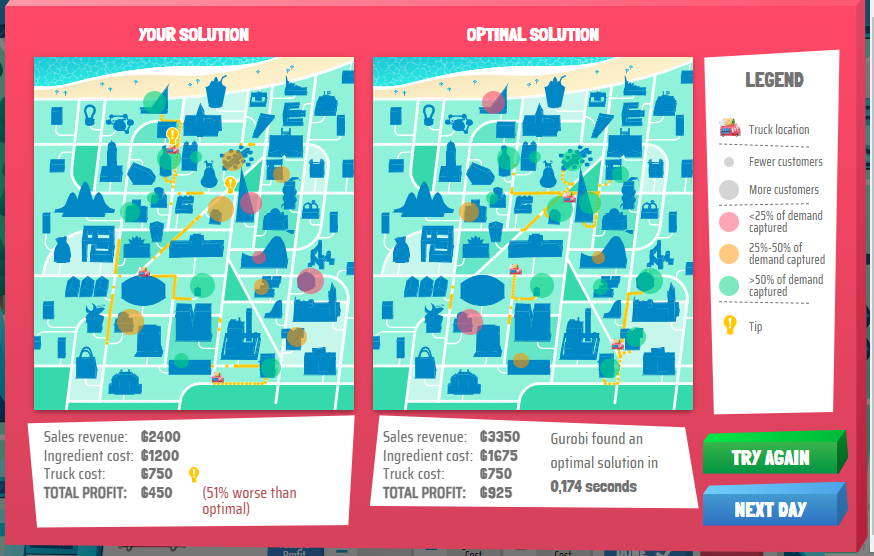